In [ ]:
from datetime import datetime
from collections import Counter
from itertools import zip_longest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import numpy  as np
from copy import deepcopy
import os

In [54]:
# Get the default or root folder of the user's system in case that any other person needs to run this setup
while not os.getcwd().endswith('Event-Aggregator'):
    os.chdir('..')
    if os.getcwd().endswith('Users'):
        print("Unable to find the root directory")
        break
users_default_path = os.getcwd()

In [55]:
prod_path = os.path.join(users_default_path,'Production_Inventory')
data_path = os.path.join(prod_path,'Data')

# Final Events
events = os.path.join(data_path,'Final_Events.csv')

In [56]:
df = pd.read_csv(events)
df.head(n = 2)

,Title,Desc,Start Date,When,Main Page,Address1,Address2,thumb,image
0,PGL Wallachia S3,Full information about PGL Wallachia S3 Dota 2...,Mar 8,"Sat, Mar 8",https://ggscore.com/en/dota-2/pgl-wallachia-se...,"PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9A","Bucharest, Romania",https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,BLAST Slam #3,Full information about BLAST Slam #3 Dota 2. M...,May 5,"Mon, May 5",https://ggscore.com/en/dota-2/blast-slam-3,NaN,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [57]:
df.replace(np.NaN,'',inplace = True)

In [58]:
df.head(n = 2)

,Title,Desc,Start Date,When,Main Page,Address1,Address2,thumb,image
0,PGL Wallachia S3,Full information about PGL Wallachia S3 Dota 2...,Mar 8,"Sat, Mar 8",https://ggscore.com/en/dota-2/pgl-wallachia-se...,"PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9A","Bucharest, Romania",https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,BLAST Slam #3,Full information about BLAST Slam #3 Dota 2. M...,May 5,"Mon, May 5",https://ggscore.com/en/dota-2/blast-slam-3,,,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [59]:
sample = df['Start Date'].iloc[0]

In [60]:
def start_date_format(date: str) -> str:
    """Ex: Mar 8 -> Datetime"""
    date = datetime.strptime(date,'%b %d')
    date = date.replace(year = 2025)
    return date.strftime("%d-%m-%y")
start_date_format(sample)

'08-03-25'

Apply the formating to only the start date

In [61]:
df['Start Date'] = df['Start Date'].apply(start_date_format)

In [62]:
df.head(n = 2)

,Title,Desc,Start Date,When,Main Page,Address1,Address2,thumb,image
0,PGL Wallachia S3,Full information about PGL Wallachia S3 Dota 2...,08-03-25,"Sat, Mar 8",https://ggscore.com/en/dota-2/pgl-wallachia-se...,"PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9A","Bucharest, Romania",https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,BLAST Slam #3,Full information about BLAST Slam #3 Dota 2. M...,05-05-25,"Mon, May 5",https://ggscore.com/en/dota-2/blast-slam-3,,,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


Parse Desc and create groups

In [63]:
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from gensim.models import Word2Vec
import gensim

In [64]:
text_data = ' '.join(list(df['Desc']))
text_data

'Full information about PGL Wallachia S3 Dota 2. Match results, VODs, streams, team rosters, schedules Full information about BLAST Slam #3 Dota 2. Match results, VODs, streams, team rosters, schedules Full information about ESL One Raleigh 2025 Dota 2. Match results, VODs, streams, team rosters, schedules Full information about PGL Wallachia S4 Dota 2. Match results, VODs, streams, team rosters, schedules Find tickets for Dota at Weingut Karl Sonntag in Nittel on 7/27/2025 at 7:00 PM Find tickets for Dota with The Q4 at Karlstorbahnhof Heidelberg in Heidelberg on 11/22/2025 at 8:00 PM 🎶 The Ultimate Dota Kehr Experience LIVE at Tollhaus—This Friday, November 21, 2025! 🎶 It’s that time of the year where everyone wants to have a musical breath! Your favorite, Dota Kehr is...  Find tickets for Dota at E-Werk Saal in Erlangen on 11/18/2025 at 8:00 PM Join us every Monday from 6p - 8p for Esports Weekly Open Play! Compete against your friends or hone your skills to become the best player i

In [65]:
tokenizer = RegexpTokenizer(r'\w+')

In [66]:
tokens = [tokenizer.tokenize(sent) for sent in sent_tokenize(text_data)]
for senti in tokens:
    print(senti)

['Full', 'information', 'about', 'PGL', 'Wallachia', 'S3', 'Dota', '2']
['Match', 'results', 'VODs', 'streams', 'team', 'rosters', 'schedules', 'Full', 'information', 'about', 'BLAST', 'Slam', '3', 'Dota', '2']
['Match', 'results', 'VODs', 'streams', 'team', 'rosters', 'schedules', 'Full', 'information', 'about', 'ESL', 'One', 'Raleigh', '2025', 'Dota', '2']
['Match', 'results', 'VODs', 'streams', 'team', 'rosters', 'schedules', 'Full', 'information', 'about', 'PGL', 'Wallachia', 'S4', 'Dota', '2']
['Match', 'results', 'VODs', 'streams', 'team', 'rosters', 'schedules', 'Find', 'tickets', 'for', 'Dota', 'at', 'Weingut', 'Karl', 'Sonntag', 'in', 'Nittel', 'on', '7', '27', '2025', 'at', '7', '00', 'PM', 'Find', 'tickets', 'for', 'Dota', 'with', 'The', 'Q4', 'at', 'Karlstorbahnhof', 'Heidelberg', 'in', 'Heidelberg', 'on', '11', '22', '2025', 'at', '8', '00', 'PM', 'The', 'Ultimate', 'Dota', 'Kehr', 'Experience', 'LIVE', 'at', 'Tollhaus', 'This', 'Friday', 'November', '21', '2025']
['It', '

In [67]:
model = Word2Vec(tokens, min_count=1, vector_size=50, window=5)
model = model.wv

In [68]:
embed = [[model[word] for word in sent] for sent in tokens]

In [69]:
#items,   sentences,    , embeding dimension
len(embed),len(embed[1]), len(embed[0][0]),

(621, 15, 50)

In [70]:
text_data = [item for item in list(df['Desc']) if item != '']
tokens    = [tokenizer.tokenize(sent) for sent in text_data]
embed     = [[model[word] for word in instance] for instance in tokens]

In [71]:
#items,   sentences,    , embeding dimension
len(embed),len(embed[1]), len(embed[0][0]),

(460, 15, 50)

In [90]:
max([len(i) for i in embed])

42

In [80]:
embed_ = [[e for t in seq for e in t] for seq in embed]

In [89]:
X = np.array(list(zip_longest(*embed_, fillvalue=0))).T
X.shape

(460, 2100)

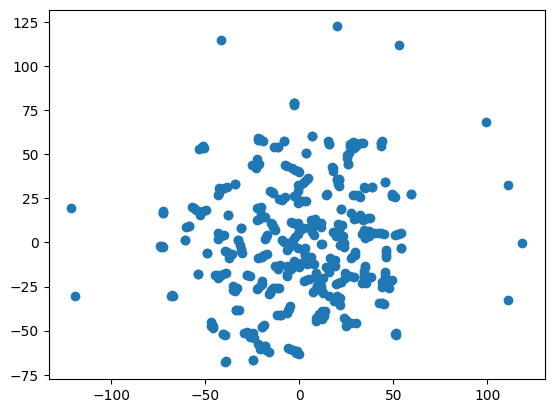

In [106]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
X_embedded[1]
#X_embedded[:,0]

plt.scatter(x = X_embedded[:,0], y = X_embedded[:,1])
plt.show()

In [ ]:
X_embedded = PCA(n_components=100).fit_transform(X)
plt.scatter(x = X_embedded[:,2], y = X_embedded[:,3])
plt.show()

In [127]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)

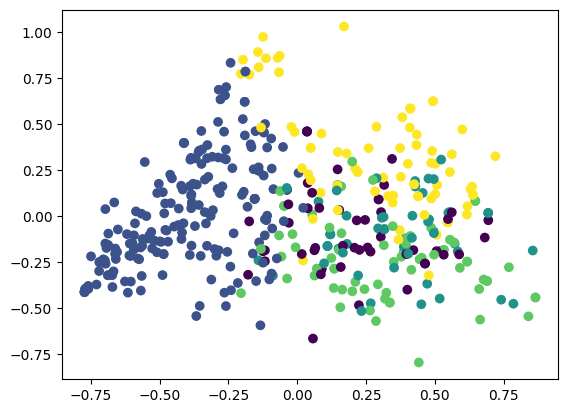

In [128]:
X_embedded = PCA(n_components=2).fit_transform(X)
plt.scatter(x = X_embedded[:,0], y = X_embedded[:,1], c = kmeans.labels_)
plt.show()

---- 
## Attempt at Bag of Words clustering

In [153]:
text_data = list(df['Desc'])
tokens = [tokenizer.tokenize(seq.lower()) for seq in text_data]
unique_tokens = set()
for row in tokens:
    for t in row:
        unique_tokens.add(t)
len(unique_tokens)

2932

In [155]:
default_row = {t:0 for t in unique_tokens}
row_1 = tokens[0]
print(row_1)
default_row.update(dict(Counter(row_1)))
print(default_row['full'])

['full', 'information', 'about', 'pgl', 'wallachia', 's3', 'dota', '2', 'match', 'results', 'vods', 'streams', 'team', 'rosters', 'schedules']
1


In [177]:
results = {}
for idx, tok_doc in enumerate(tokens):
    tmp = {t:0 for t in unique_tokens}
    tmp.update(dict(Counter(tok_doc)))
    results[idx] = deepcopy(tmp)

In [187]:
bag_of_words = pd.DataFrame.from_dict(data = results, orient='index')
bag_of_words.shape
#bag_of_words.to_csv('bag_of_words.csv', index=False,compression='gzip')

(489, 2932)

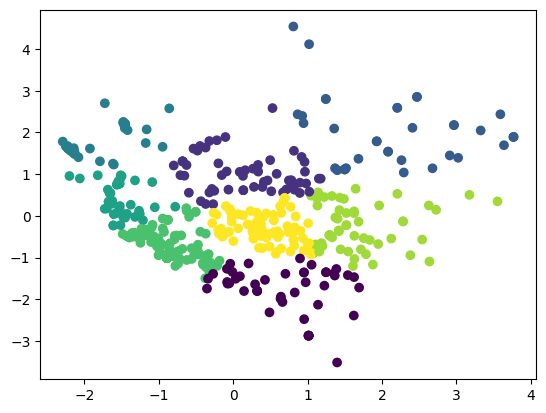

In [231]:
X_embedded = PCA(n_components=2).fit_transform(bag_of_words)
kmeans     = KMeans(n_clusters=8, random_state=42, n_init="auto").fit(X_embedded)
plt.scatter(x = X_embedded[:,0], y = X_embedded[:,1], c = kmeans.labels_)
plt.show()

In [ ]:
#bag_of_words['Target'] = kmeans.labels_

(489, 2)


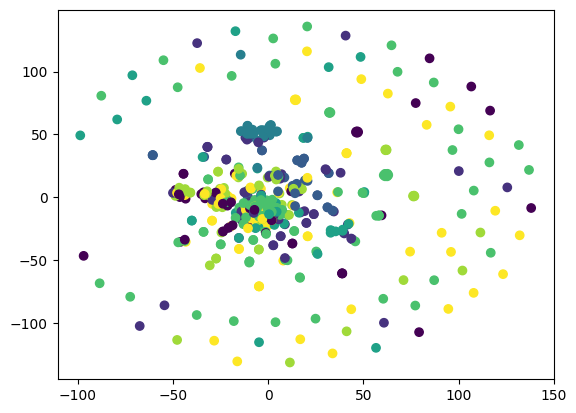

In [235]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(bag_of_words)
print(X_embedded.shape)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = kmeans.labels_)
plt.show()

In [236]:
bag_of_words['Label'] = kmeans.labels_

In [238]:
df = pd.read_csv(events)
df.head(n = 2)

,Title,Desc,Start Date,When,Main Page,Address1,Address2,thumb,image
0,PGL Wallachia S3,Full information about PGL Wallachia S3 Dota 2...,Mar 8,"Sat, Mar 8",https://ggscore.com/en/dota-2/pgl-wallachia-se...,"PGL ESPORTS, Bulevardul Dimitrie Pompeiu 9-9A","Bucharest, Romania",https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,BLAST Slam #3,Full information about BLAST Slam #3 Dota 2. M...,May 5,"Mon, May 5",https://ggscore.com/en/dota-2/blast-slam-3,NaN,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [239]:
df['label'] = kmeans.labels_

In [ ]:
#df.to_csv(events, index=False)

---

In [244]:
df['label'].value_counts()

label
5    131
7     84
1     59
6     56
0     50
4     40
2     36
3     33
Name: count, dtype: int64

In [251]:
list(df[df['label'] == 2]['Desc'][:15])

['FACTS is the largest pop culture conventions in the Benelux and one of the largest events of its kind in Europe. It takes place in Belgium',
 'Join the Extension Office on Thursday, March 6, 2025, at 10:45am at the Person County Senior Center for a "Your Food: Fibs and Facts" workshop on hot topics concerning the food we eat, such as...',
 'Trade Show Miami 2025 - Business Networking Events and Expo in Miami! The location is at the Miami Airport Convention Center, 711 NW 72nd Ave, Miami, FL 33126, on March 6th, 2025 (Inside the 1st...',
 "The annual Heli Expo is the world's largest reunion of the international helicopter community and is held alternately in different cities in the USA. Heli Expo provides the latest in helicopter...",
 'Thunder-Con 2024 will be held on the weekend of July 5th and 6th at Art in the Loft in Alpena. Looking forward to seeing everyone again this year. This is a free event open to the public...',
 "This event will take place in person at Sedgwick Branch. I